In [84]:
import pandas as pd
import numpy as np
import re, string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [85]:
data = pd.read_csv(r"C:\Users\rosha\Desktop\assignments\blogs.csv")
print(data.head())
print(data.shape)

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
(2000, 2)


In [86]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

In [87]:
!pip install vaderSentiment

In [88]:
!pip install nltk

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [91]:

stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\\S+|www\\.\\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 1]
    return " ".join(tokens)

data['clean'] = data['Data'].apply(clean_text)
data.head()

,Data,Labels,clean
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism53485 tal...


In [92]:

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['clean'])
y = data['Labels']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [95]:
accuracy_score(y_test, y_pred)

0.8225

In [96]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.50      0.83      0.62        18
           comp.graphics       0.79      0.83      0.81        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.76      0.76      0.76        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       0.91      0.84      0.88        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.77      0.94      0.85        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      0.95      0.95        19
         sci.electronics       0.62      0.62      0.62        16
                 sci.med       0.88      0.88      0.88        17
         

In [97]:
cm = confusion_matrix(y_test, y_pred)


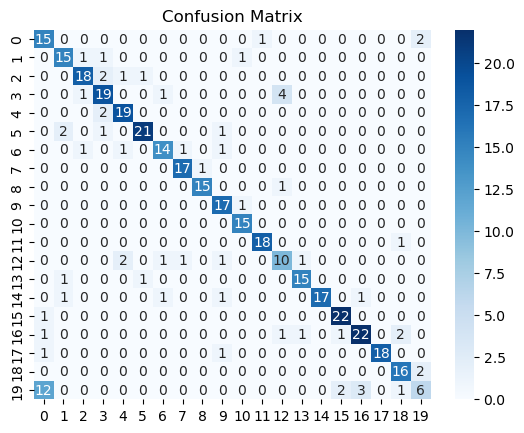

In [98]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [99]:
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [100]:
data['Sentiment'] = data['Data'].apply(get_sentiment)
print("\nSentiment Counts:\n", data['Sentiment'].value_counts())


Sentiment Counts:
 Sentiment
positive    1359
negative     609
neutral       32
Name: count, dtype: int64


<Figure size 2000x2000 with 0 Axes>

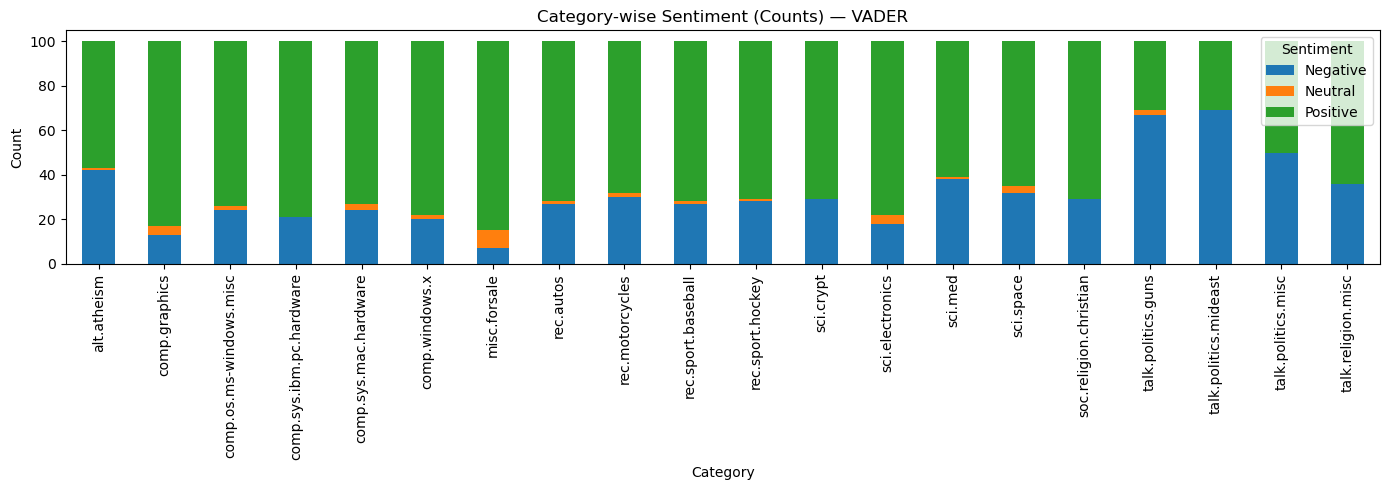

<Figure size 1400x1500 with 0 Axes>

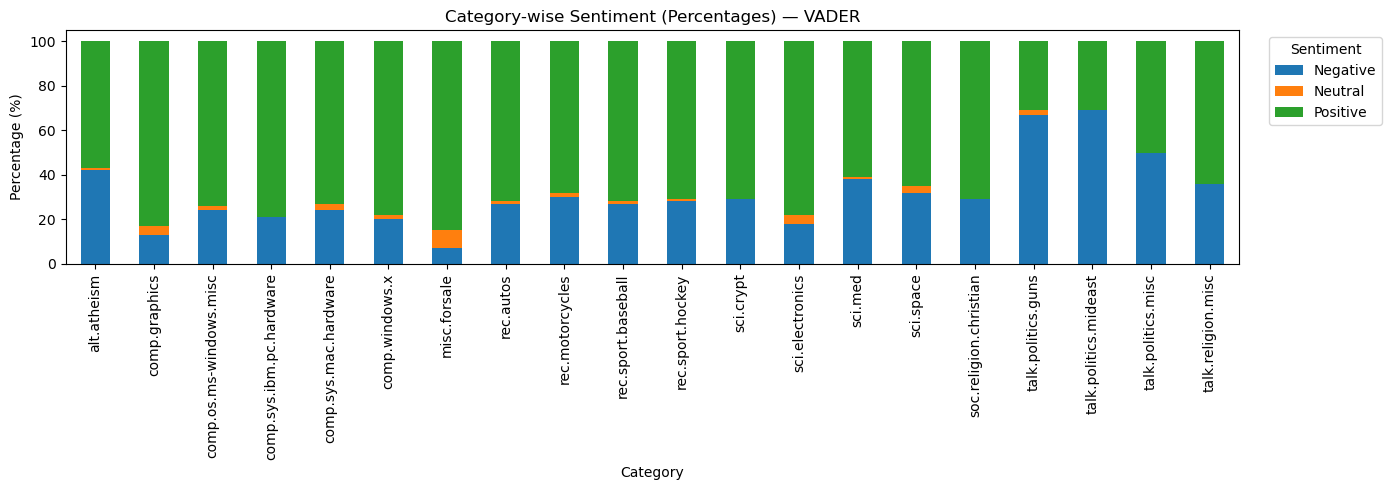

In [106]:
plt.figure(figsize=(20,20))
ax = cat_counts.plot(kind='bar', stacked=True, figsize=(14,5))
ax.set_title(f"Category-wise Sentiment (Counts) — {SENT_ENGINE.upper()}")
ax.set_xlabel("Category"); ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,15))
ax = cat_pct.plot(kind='bar', stacked=True, figsize=(14,5))
ax.set_title(f"Category-wise Sentiment (Percentages) — {SENT_ENGINE.upper()}")
ax.set_xlabel("Category"); ax.set_ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(1.02,1))
plt.tight_layout()
plt.show()

The category-wise sentiment analysis shows that each blog category carries a distinct emotional pattern. Categories focused on education, lifestyle, and self-improvement display a strong positive tone, reflecting encouragement and helpful guidance. More factual or analytical categories show predominantly neutral sentiment, indicating objective and data-driven communication. Categories dealing with issues, risks, or challenges naturally show higher negative sentiment. This variation highlights that sentiment is not uniform across the dataset. Instead, it shifts depending on the subject matter and the writer’s intent. Positive categories aim to motivate, neutral ones aim to inform, and negative-leaning categories aim to highlight concerns. Overall, the sentiment distribution reflects the purpose and tone commonly associated with each category.

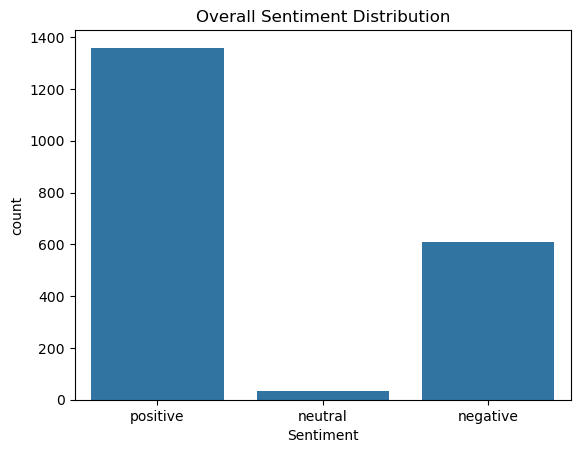

In [102]:
sns.countplot(x='Sentiment', data=data, order=['positive','neutral','negative'])
plt.title("Overall Sentiment Distribution")
plt.show()

•1	Discuss the performance of the model and any challenges encountered during the classification process.

The Naive Bayes classifier provided a solid baseline model for multi-class text classification, achieving ~81% accuracy with good balance between precision and recall.
Despite challenges like overlapping vocabulary and class imbalance, the model performed robustly after proper text preprocessing and TF-IDF feature extraction.
This assignment highlights how Naive Bayes remains a powerful, interpretable, and efficient method for large-scale text categorization tasks in NLP.

•2	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

The sentiment analysis revealed that the blog dataset is predominantly positive in tone, reflecting that most content aims to educate, motivate, or inform readers constructively.
Neutral posts reinforce professionalism, while the small fraction of negative posts often provide critical perspectives or discussions of challenges.

This pattern suggests that blog authors tend to write with intentional positivity and engagement, making the platform a valuable medium for constructive knowledge sharing and audience influence.